In [24]:
from source.regency import Regency
from source.mapping import Mapping
from source.DQNAgent import DQNAgent
from IPython.display import clear_output
import warnings
warnings.filterwarnings('ignore')


seasons = 1
Game = Regency(True)
clear_output()

for a in range(seasons):v-dalaso@microsoft.com
    print(a)
    Game.random_events()
    Game.collect_regency_points()
    Game.domain_initiative()
    Game.collect_gold_bars()
    Game.maintenance_costs(Update=True)
    Game.Seasons[Game.Season]['Season']
    Game.take_domain_actions()
    Game.war_move()
    Game.clean_up()
Game.clear_screen()
import pandas as pd
df = pd.concat([Game.Seasons[b]['Actions'][a+1] for a in range(3) for b in range(seasons)])
print(set(df['Action']))
Game.War

{'create_holding', 'diplomacy_force_tribute', 'realm_magic_demagogue_enemy', 'decree_general', 'espionage_discover_troop_movements', 'investiture_become_vassal_friend', 'muster_army', 'investure_divest_enemy', 'agitiate_for_friend', 'diplomacy_form_alliance', 'declare_war', 'realm_magic_alchemy', 'realm_magic_blight', 'decree_asset_seizure', 'grant', 'investure_invest_friend', 'rule_holdings', 'espionage_heresy', 'muster_levies', 'contest_holding', 'muster_mercenaries', 'diplomacy_trade_agreement', 'disband_army', 'adventuring', 'diplomacy_respond_to_brigandage', 'espionage_intrigue', 'espionage_assassination', 'espionage_corruption', 'realm_magic_demagogue_friend', 'espionage_diplomatic_details', 'Lieutenant'}


,Year,Location,Event,Notes


In [23]:
self.Troops

,Regent,Provence,Type,Cost,CR,Garrisoned,Home,Injury
1,GG,Rivenrock,Dwarf Crossbows,2,2.0,0,,0
2,GG,Rivenrock,Dwarf Guards,2,2.0,0,,0
3,GG,Rivenrock,Dwarf Crossbows,2,2.0,0,,0
4,GG,Rivenrock,Dwarf Guards,2,2.0,0,,0
5,GG,Rivenrock,Dwarf Crossbows,2,2.0,0,,0
6,GG,Rivenrock,Dwarf Guards,2,2.0,0,,0
7,GG,Rivenrock,Dwarf Crossbows,2,2.0,0,,0
8,DA,Annuire,Cavalry,2,3.0,0,,0
9,DA,Avarien,Knights,2,4.0,0,,0
10,DA,Bherin,Elite Infantry,2,2.0,0,,0


In [2]:
df[df['Action'].str.contains('build')]

,Regent,Actor,Action Type,Action,Decision,Target Regent,Provence,Target Provence,Target Holding,Success?,Base Reward,State,Invalid,Message


In [3]:
Game.errors

[]

In [4]:
%matplotlib notebook

<IPython.core.display.Javascript object>


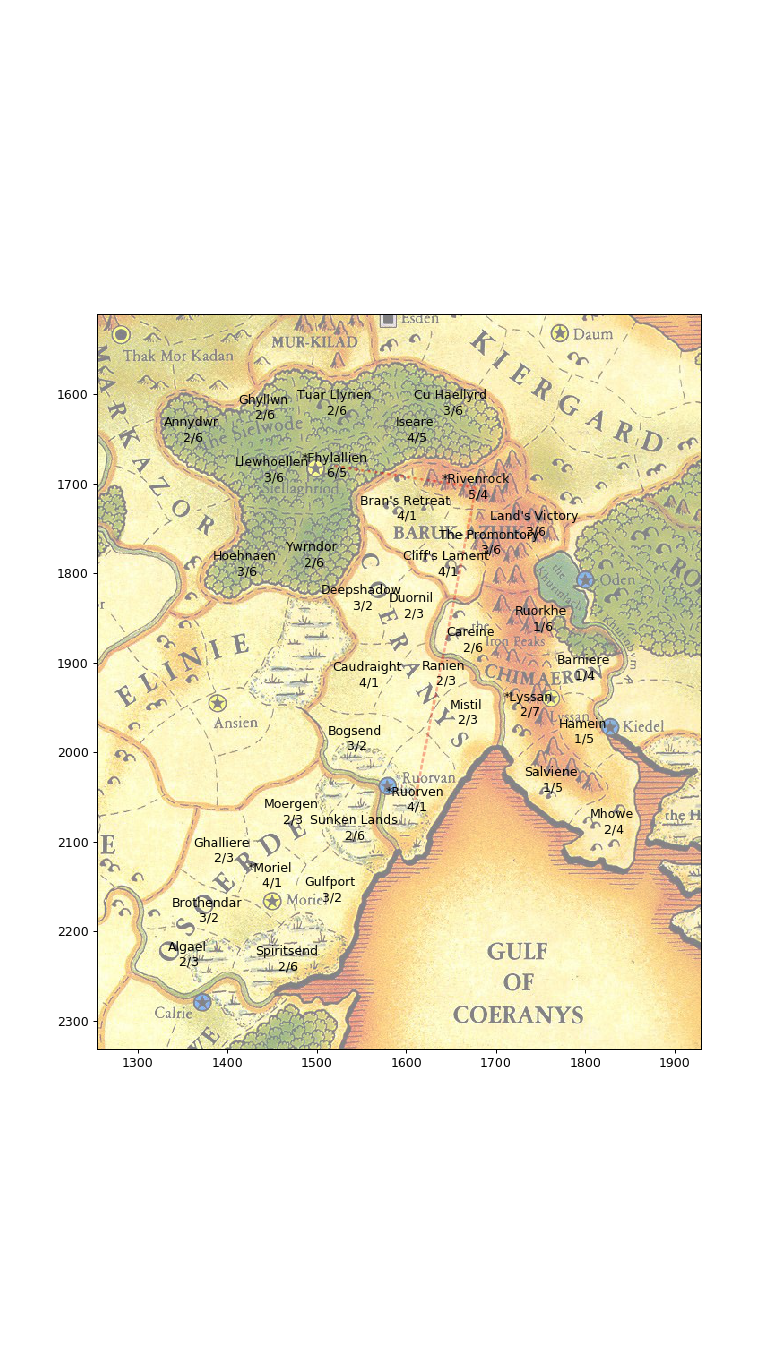

In [18]:

Map = Mapping(Game)
Map.focus_regions(['Eastern Marches'])
Map.show(show_troops=True)

In [22]:
self = Game
import pandas as pd

temp = self.Troops[self.Troops['Garrisoned']==1]
# temp = pd.merge(temp, self.Provences[['Provence', 'Castle']], on='Provence', how='left')
# temp_ = temp[['Provence','Castle']].copy()
# temp_['count'] = 1
# temp_ = temp_.groupby(['Provence','Castle']).sum().reset_index()
# temp_['space'] = temp
        
temp

,Regent,Provence,Type,Cost,CR,Garrisoned,Home,Injury
